# Prediction using Decison Tree Algorithm

## Task 6: Create the decision tree classifier and visualize it graphically.
### Objective: If we feed any new data to this classifier it should be able to predict the right class accordingly. 

#### Dataset: https://bit.ly/3kXTdox
#### Language: Python 3
#### Author: Preethi Evelyn Sadanandan

In [1]:
#importing relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
#loading the dataset
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Declaring the input and target variables
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

### Building a classification model using decision tree algorithm

In [5]:
#splitting the dataset into a 80/20 split using scikit-learn
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [6]:
print(x_train.shape, y_train.shape)

(135, 4) (135,)


In [7]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
print(clf.feature_importances_) #outputs the feature importance of each variable in the model
#greater the feature importance, more the significance of the variable

[0.01481725 0.01481725 0.05508876 0.91527674]


### Making predictions

In [9]:
print(clf.predict(x_test))

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


In [10]:
print(clf.predict_proba(x_test))

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [11]:
print(y_test)

29         Iris-setosa
118     Iris-virginica
62     Iris-versicolor
43         Iris-setosa
139     Iris-virginica
92     Iris-versicolor
135     Iris-virginica
41         Iris-setosa
78     Iris-versicolor
63     Iris-versicolor
116     Iris-virginica
54     Iris-versicolor
50     Iris-versicolor
142     Iris-virginica
12         Iris-setosa
Name: Species, dtype: object


#### Model performance

In [12]:
print("The R-squared of the model is", clf.score(x_test, y_test))

The R-squared of the model is 1.0


### Visualizing the decision tree

[Text(418.5, 498.3, 'X[3] <= 0.75\ngini = 0.667\nsamples = 135\nvalue = [46, 44, 45]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 89\nvalue = [0, 44, 45]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.187\nsamples = 48\nvalue = [0, 43, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.2

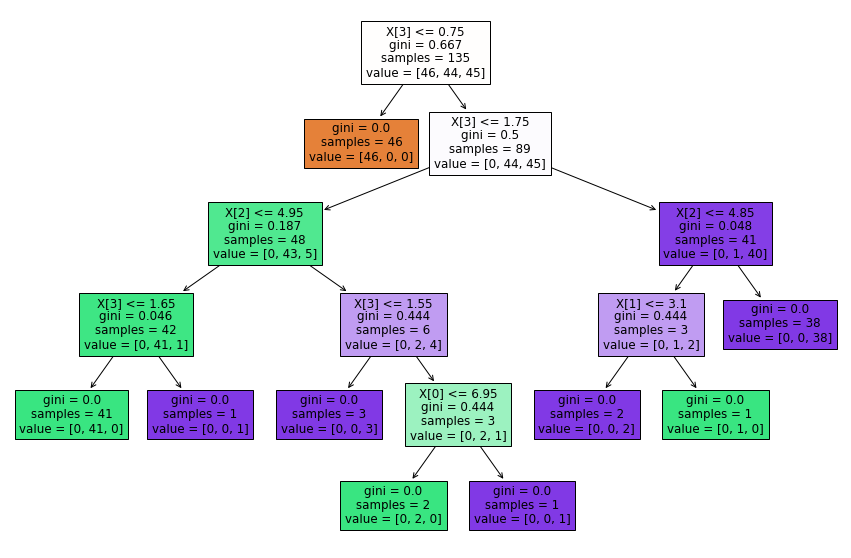

In [13]:
plt.figure(figsize = (15,10))
tree.plot_tree(clf, filled = True)

In [14]:
print(tree.export_text(clf))

|--- feature_3 <= 0.75
|   |--- class: Iris-setosa
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica

